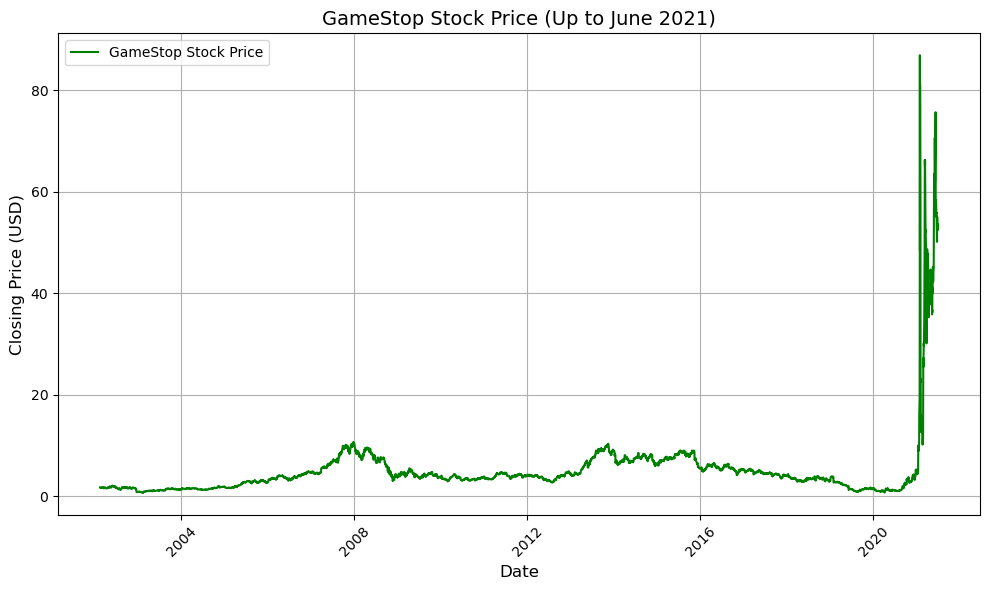

In [2]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# --- GameStop Stock Data ---
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)

# --- GameStop Revenue Data ---
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
soup = BeautifulSoup(html_data_2, "html.parser")
table = soup.find_all("table")[0]

# Extract rows and clean
rows = []
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if date and revenue:
            rows.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(rows)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# --- Filter stock data to June 2021 ---
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# --- Reuse make_graph function ---
def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Price', color='green')
    plt.title(f'{stock_name} Stock Price (Up to June 2021)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price (USD)', fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plot GameStop Stock ---
make_graph(gme_data_filtered, gme_revenue, 'GameStop')
